**I would not advise running this notebook as some cells took 2 hours to train on my computer, if you want to test the code for the agent you can simply execute the "non grid search" cells.**

In [18]:
%reload_ext autoreload
%autoreload 2

import os, sys
import gymnasium as gym
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

import text_flappy_bird_gym
from agents import * # code for agents
from utils import * #mainly plotting utils

In [2]:
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
env_screen = gym.make('TextFlappyBird-screen-v0', height = 15, width = 20, pipe_gap = 4)

# MC Control

Here we train an MC control agent on both environnements, and tune its hyperparameters to optimise performance

## Base environnement

In [3]:
alpha_values = [0.01, 0.1, 0.5]
epsilon_values = [0.1, 0.5, 0.9]
epsilon_decay_values = [0.9999, 0.999, 0.99]

param_dict = {
    'alpha': alpha_values,
    'epsilon': epsilon_values,
    'epsilon_decay': epsilon_decay_values,
    'num_states': [14*22],
    'num_actions': [2],
    'epsilon_min': [0.01],
    'seed': [42],
}

In [4]:
results = grid_search_params(env, 'MC', param_dict, num_episodes=5000, max_score=100, seed=42)

Set 1 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:01<00:00, 2976.11it/s]


Set 2 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:01<00:00, 3444.09it/s]


Set 3 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:01<00:00, 3539.95it/s]


Set 4 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:04<00:00, 1109.08it/s]


Set 5 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:03<00:00, 1393.88it/s]


Set 6 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:03<00:00, 1291.39it/s]


Set 7 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:04<00:00, 1079.83it/s]


Set 8 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:56<00:00, 88.81it/s] 


Set 9 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:19<00:00, 252.03it/s]


Set 10 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:09<00:00, 553.34it/s] 


Set 11 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:04<00:00, 1079.63it/s]


Set 12 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:02<00:00, 1788.71it/s]


Set 13 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:15<00:00, 331.58it/s]


Set 14 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [03:38<00:00, 22.92it/s] 


Set 15 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:08<00:00, 591.88it/s]


Set 16 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:06<00:00, 734.36it/s] 


Set 17 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [02:22<00:00, 35.12it/s] 


Set 18 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [04:28<00:00, 18.63it/s] 


Set 19 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:23<00:00, 211.79it/s]


Set 20 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [02:37<00:00, 31.76it/s] 


Set 21 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:23<00:00, 215.40it/s] 


Set 22 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:07<00:00, 712.34it/s]


Set 23 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [01:56<00:00, 42.96it/s] 


Set 24 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [04:15<00:00, 19.58it/s]


Set 25 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:06<00:00, 750.05it/s] 


Set 26 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [01:54<00:00, 43.55it/s] 


Set 27 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [03:35<00:00, 23.18it/s]


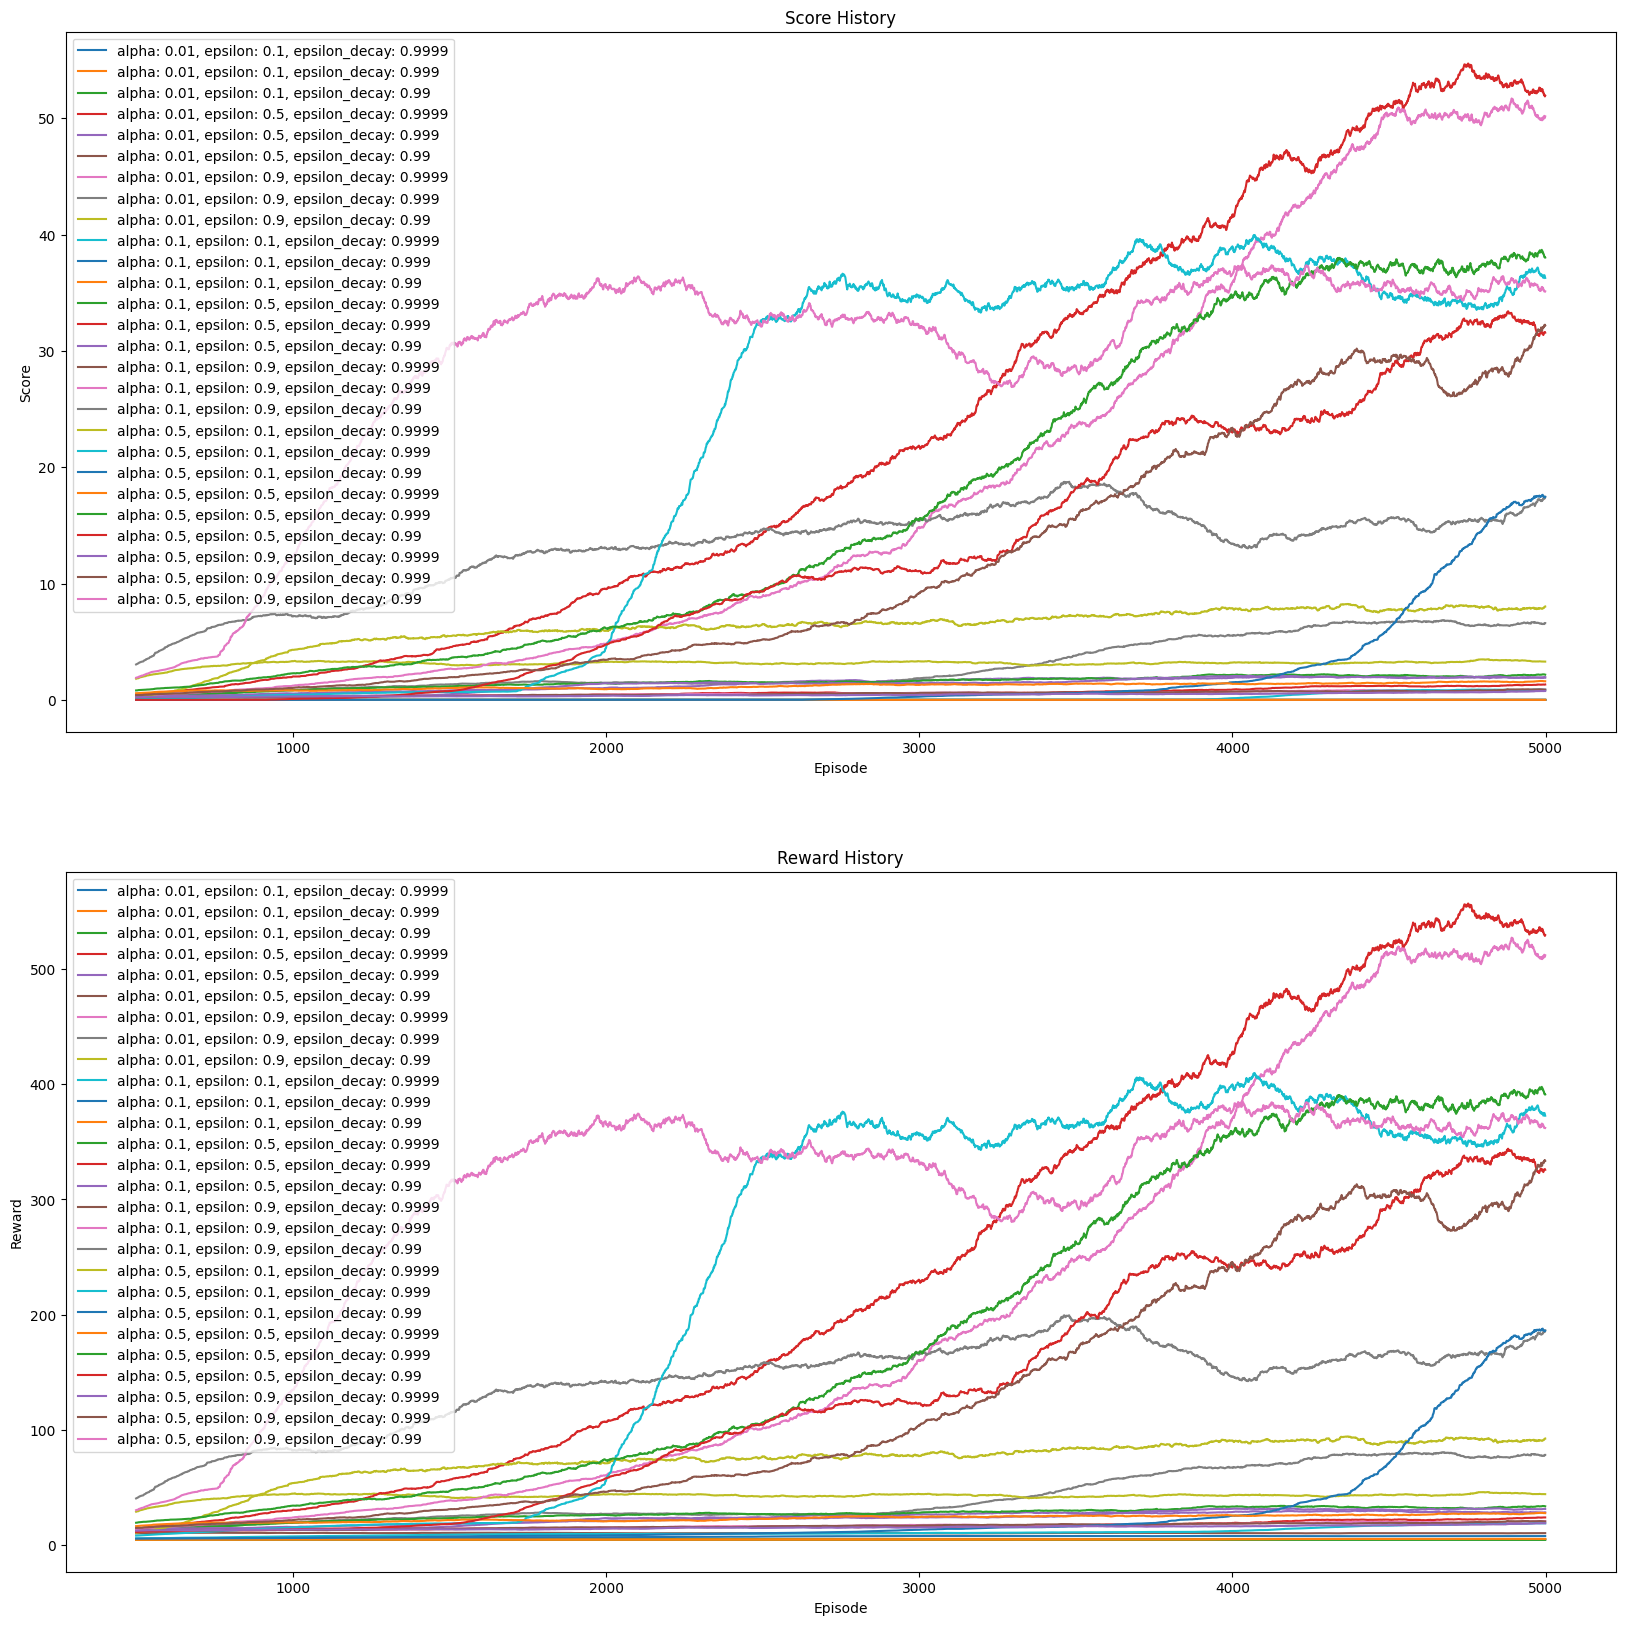

In [9]:
plot_results(results)

The best parameters are $α : 0.5, ε : 0.5, ε_{decay} : 0.99$

In [8]:
best_MC_base_params = {"alpha":0.5, "epsilon":0.5, "epsilon_decay":0.99, "epsilon_min":0.01, "seed":42}
best_MC_base_agent = MCControlAgent(env, best_MC_base_params)

random.seed(42)
_ = best_MC_base_agent.train(7000, 100)

100%|██████████| 7000/7000 [04:32<00:00, 25.72it/s] 


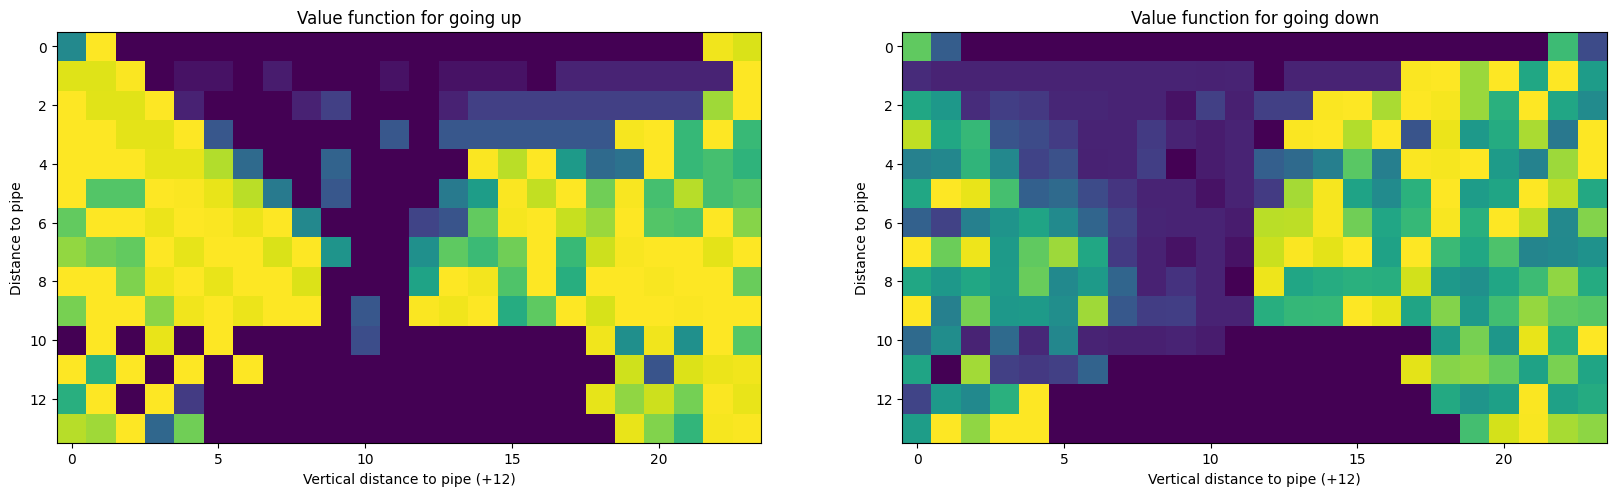

In [19]:
plot_value_function(best_MC_base_agent)

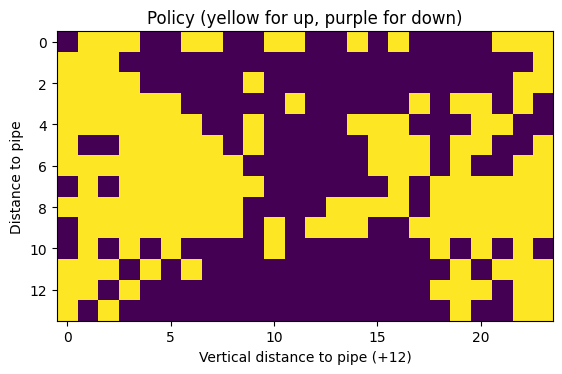

In [20]:
plot_policy(best_MC_base_agent)

## Screen environnement

In [6]:
alpha_values = [0.01, 0.1, 0.5]
epsilon_values = [0.1, 0.5, 0.9]
epsilon_decay_values = [0.9999, 0.999, 0.99]

param_dict_screen = {
    'alpha': alpha_values,
    'epsilon': epsilon_values,
    'epsilon_decay': epsilon_decay_values,
    'num_actions': [2],
    'epsilon_min': [0.01],
    'seed': [42],
}

In [12]:
results_screen = grid_search_params(env_screen, "MC", param_dict_screen, num_episodes=5000, max_score=100, seed=42)

Set 1 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:16<00:00, 303.78it/s]


Set 2 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:18<00:00, 265.70it/s]


Set 3 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:26<00:00, 190.99it/s]


Set 4 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [01:08<00:00, 73.19it/s]


Set 5 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [01:07<00:00, 74.17it/s]


Set 6 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:48<00:00, 102.31it/s]


Set 7 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [01:09<00:00, 71.69it/s]


Set 8 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [01:19<00:00, 62.75it/s]


Set 9 : Running alpha: 0.01, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [01:05<00:00, 75.79it/s]


Set 10 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:48<00:00, 102.90it/s]


Set 11 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:31<00:00, 158.17it/s]


Set 12 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:28<00:00, 173.05it/s]


Set 13 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:52<00:00, 95.93it/s] 


Set 14 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:59<00:00, 83.41it/s]


Set 15 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:43<00:00, 114.89it/s]


Set 16 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:41<00:00, 119.36it/s]


Set 17 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:41<00:00, 121.87it/s]


Set 18 : Running alpha: 0.1, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:33<00:00, 148.50it/s]


Set 19 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:34<00:00, 145.65it/s]


Set 20 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:33<00:00, 147.26it/s]


Set 21 : Running alpha: 0.5, epsilon: 0.1, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:21<00:00, 232.28it/s]


Set 22 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:40<00:00, 124.95it/s]


Set 23 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:37<00:00, 134.80it/s]


Set 24 : Running alpha: 0.5, epsilon: 0.5, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:31<00:00, 158.73it/s]


Set 25 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.9999


100%|██████████| 5000/5000 [00:34<00:00, 144.73it/s]


Set 26 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.999


100%|██████████| 5000/5000 [00:32<00:00, 154.08it/s]


Set 27 : Running alpha: 0.5, epsilon: 0.9, epsilon_decay: 0.99


100%|██████████| 5000/5000 [00:22<00:00, 226.98it/s]


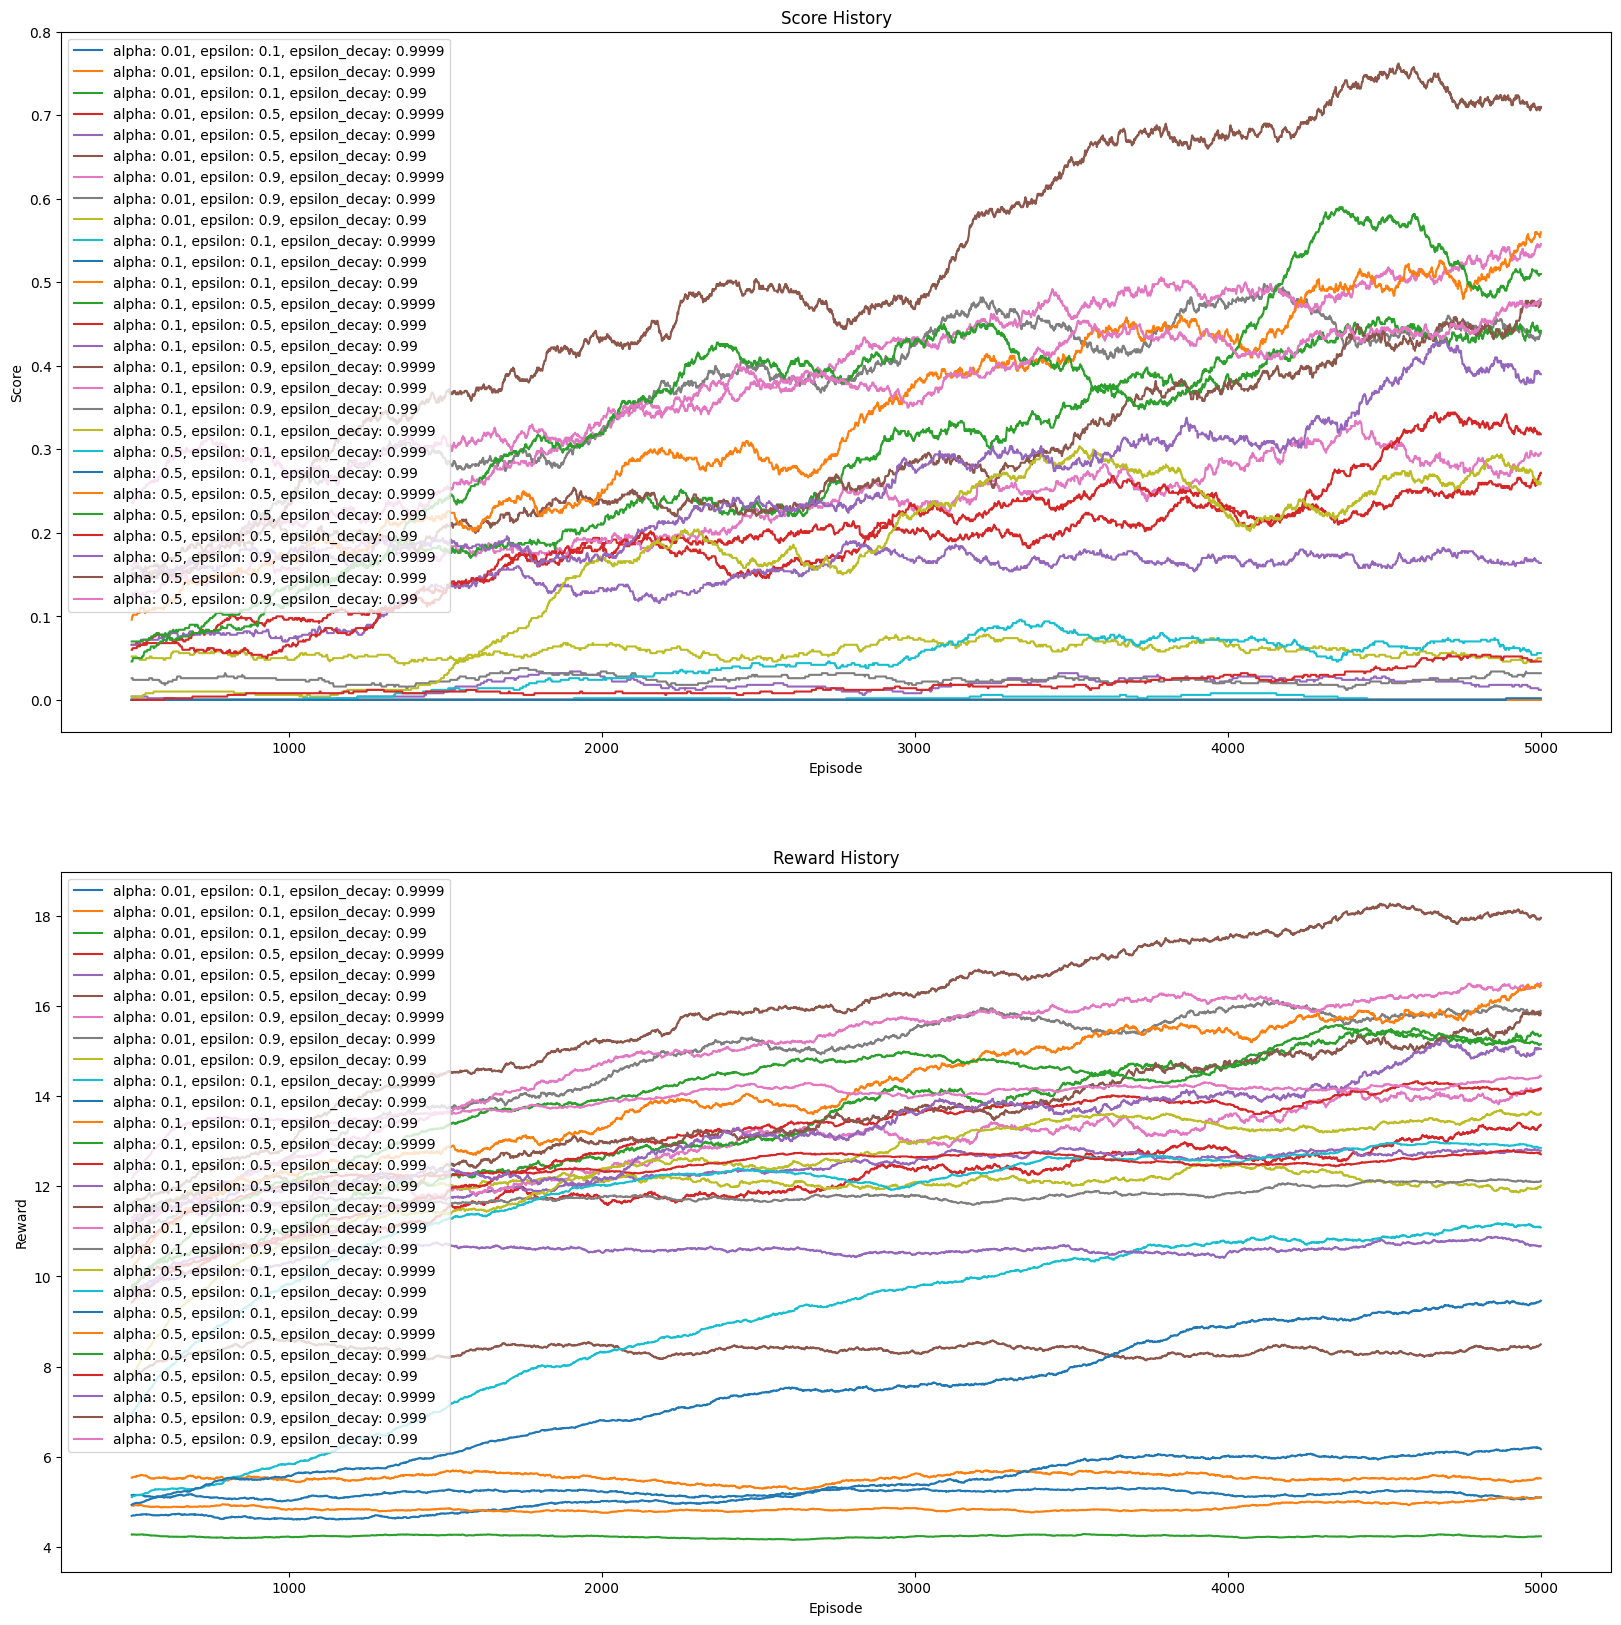

In [13]:
plot_results(results_screen)

Let's see of the best obtained parameters can lead to good scores when trained for a very long time

In [45]:
best_params = get_best_params(results_screen)
print("The best parameters are : \n",best_params)
best_MC_screen_agent = MCControlAgent(env_screen, best_params)

The best parameters are : 
 {'alpha': 0.5, 'epsilon': 0.9, 'epsilon_decay': 0.999, 'num_actions': 2, 'epsilon_min': 0.01, 'seed': 42}


In [46]:
random.seed(42)
_, best_score_screen_MC, best_reward_screen_MC = best_MC_screen_agent.train(num_episodes=50000, max_score=100)

100%|██████████| 50000/50000 [10:48<00:00, 77.05it/s] 


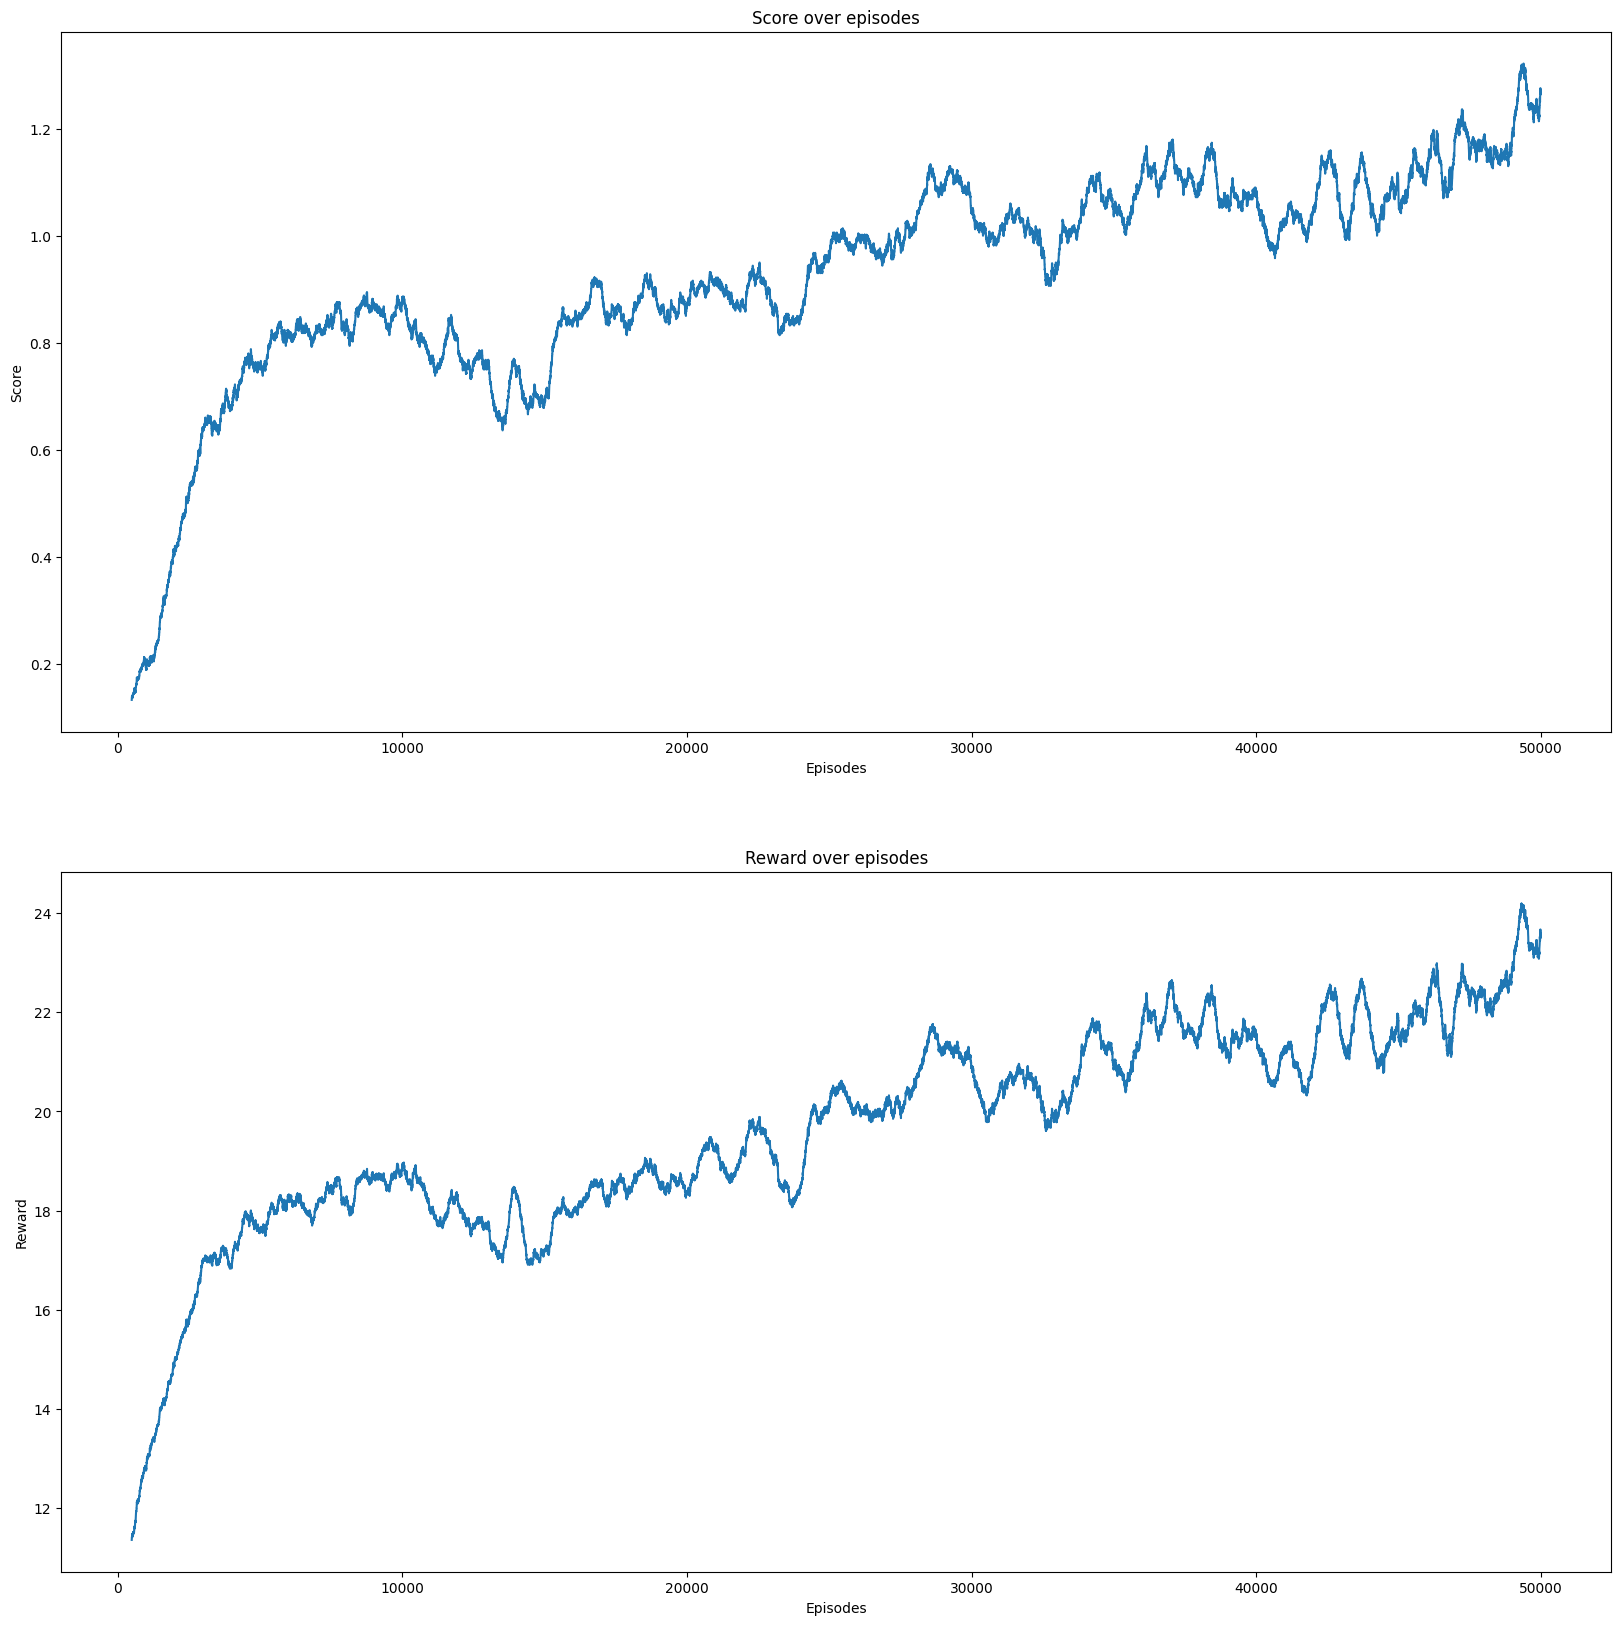

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
ax[0].plot(pd.DataFrame(best_score_screen_MC).rolling(500).mean())
ax[0].set_title("Score over episodes")
ax[0].set_xlabel("Episodes")
ax[0].set_ylabel("Score")
ax[1].plot(pd.DataFrame(best_reward_screen_MC).rolling(500).mean())
ax[1].set_xlabel("Episodes")
ax[1].set_ylabel("Reward")
ax[1].set_title("Reward over episodes")
plt.show()

# Sarsa($\lambda$)

## Base environnement

In [3]:
alpha_values = [0.01, 0.1]
epsilon_values = [0.1, 0.5]
epsilon_decay_values = [0.9999, 0.999, 0.99]
lambda_values = [0.1, 0.5, 0.9]

param_dict_sarsa = {
    'alpha': alpha_values,
    'epsilon': epsilon_values,
    'epsilon_decay': epsilon_decay_values,
    'lambd': lambda_values,
    'num_actions': [2],
    'epsilon_min': [0.01],
    'seed': [42],
}

In [17]:
results_sarsa = grid_search_params(env, "SL", param_dict_sarsa, num_episodes=5000, max_score=100, seed=42)

Set 1 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 5000/5000 [00:18<00:00, 277.12it/s]


Set 2 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 5000/5000 [00:19<00:00, 261.50it/s]


Set 3 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 5000/5000 [00:20<00:00, 246.44it/s]


Set 4 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 5000/5000 [00:15<00:00, 316.58it/s]


Set 5 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 5000/5000 [00:16<00:00, 302.10it/s]


Set 6 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 5000/5000 [00:17<00:00, 283.87it/s]


Set 7 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 5000/5000 [00:12<00:00, 398.30it/s]


Set 8 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 5000/5000 [00:12<00:00, 401.62it/s]


Set 9 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 5000/5000 [00:13<00:00, 364.58it/s]


Set 10 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 5000/5000 [00:30<00:00, 162.38it/s]


Set 11 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 5000/5000 [01:27<00:00, 57.33it/s] 


Set 12 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 5000/5000 [03:26<00:00, 24.18it/s]


Set 13 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 5000/5000 [01:30<00:00, 55.38it/s] 


Set 14 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 5000/5000 [00:28<00:00, 173.44it/s]


Set 15 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 5000/5000 [00:35<00:00, 142.62it/s]


Set 16 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 5000/5000 [01:02<00:00, 80.46it/s] 


Set 17 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 5000/5000 [01:56<00:00, 42.96it/s]


Set 18 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 5000/5000 [02:23<00:00, 34.90it/s] 


Set 19 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 5000/5000 [00:58<00:00, 85.49it/s] 


Set 20 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 5000/5000 [01:42<00:00, 48.72it/s] 


Set 21 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 5000/5000 [01:55<00:00, 43.39it/s] 


Set 22 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 5000/5000 [00:40<00:00, 123.38it/s]


Set 23 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 5000/5000 [00:17<00:00, 284.44it/s]


Set 24 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 5000/5000 [00:23<00:00, 215.78it/s]


Set 25 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 5000/5000 [00:37<00:00, 135.05it/s]


Set 26 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 5000/5000 [00:56<00:00, 88.29it/s] 


Set 27 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 5000/5000 [01:05<00:00, 76.34it/s]


Set 28 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 5000/5000 [04:09<00:00, 20.06it/s]


Set 29 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 5000/5000 [05:12<00:00, 16.00it/s]


Set 30 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 5000/5000 [01:36<00:00, 51.74it/s] 


Set 31 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 5000/5000 [07:37<00:00, 10.93it/s]


Set 32 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 5000/5000 [06:41<00:00, 12.46it/s]


Set 33 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 5000/5000 [10:23<00:00,  8.02it/s]


Set 34 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 5000/5000 [00:25<00:00, 199.39it/s]


Set 35 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 5000/5000 [00:26<00:00, 188.32it/s]


Set 36 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 5000/5000 [01:33<00:00, 53.40it/s]


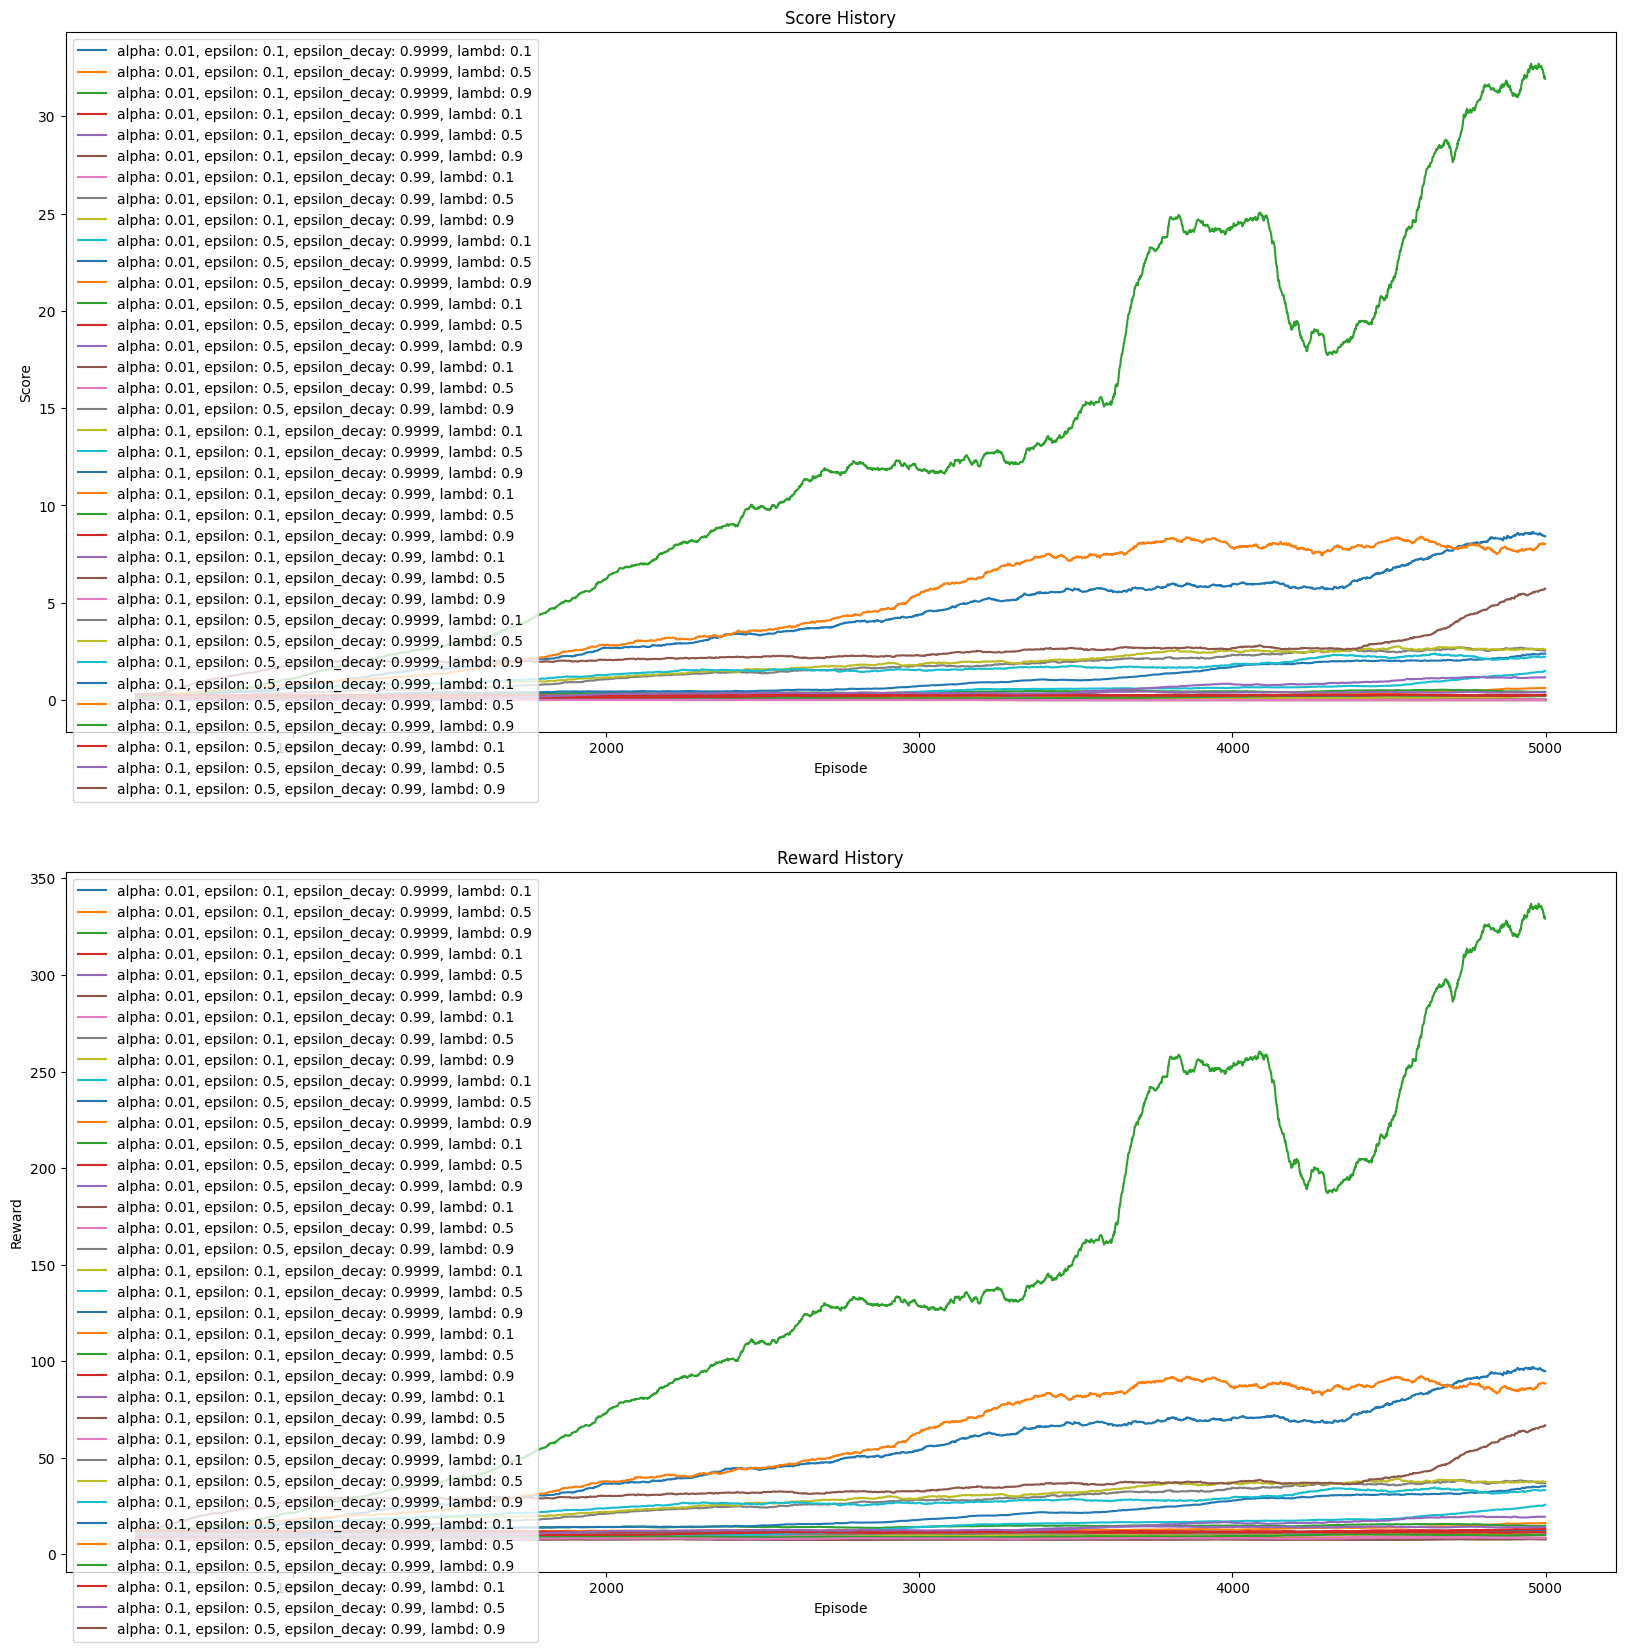

In [24]:
plot_results(results_sarsa)

We can see here that the best set of parameters is : $\{\alpha : 0.1, \epsilon:0.5, \epsilon_{decay}:0.999, \lambda:0.9\}$

In [21]:
best_params_sarsa = { 'alpha': 0.1, 'epsilon': 0.5, 'epsilon_decay': 0.999, 'lambd': 0.9, 'num_actions': 2, 'epsilon_min': 0.01, 'seed': 42}
best_SARSA_agent = SarsaLambdaAgent(env, best_params_sarsa)

random.seed(42)
_, best_score_sarsa, best_reward_sarsa = best_SARSA_agent.train(5000, 100)

100%|██████████| 5000/5000 [14:51<00:00,  5.61it/s]


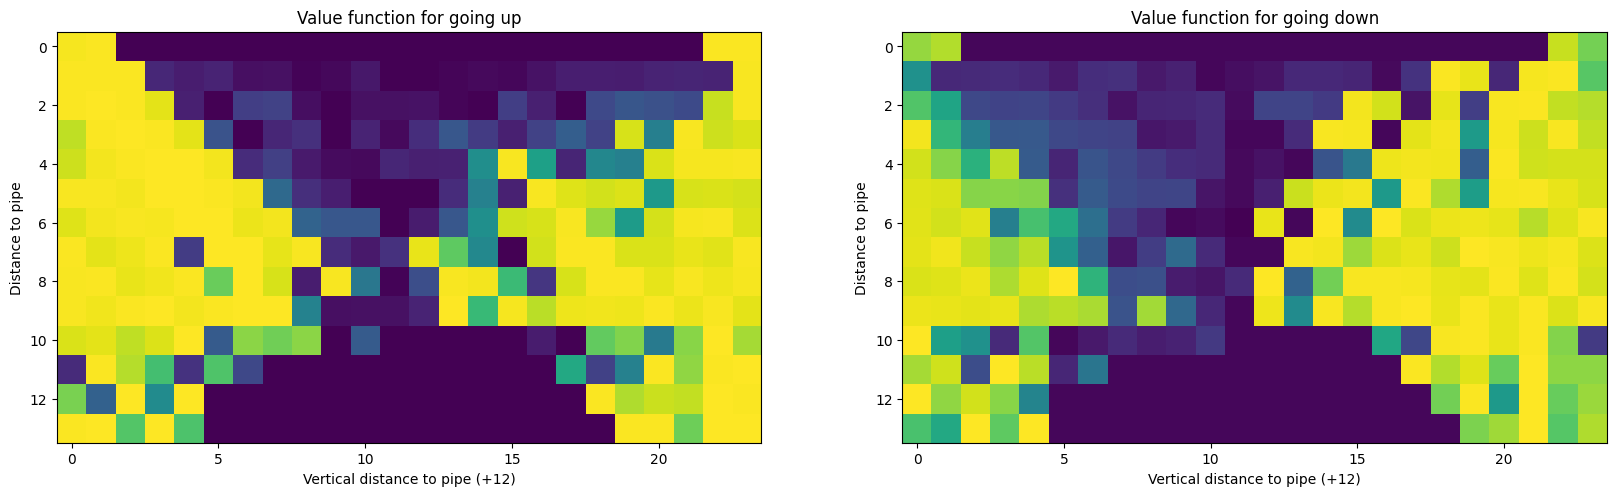

In [22]:
plot_value_function(best_SARSA_agent)

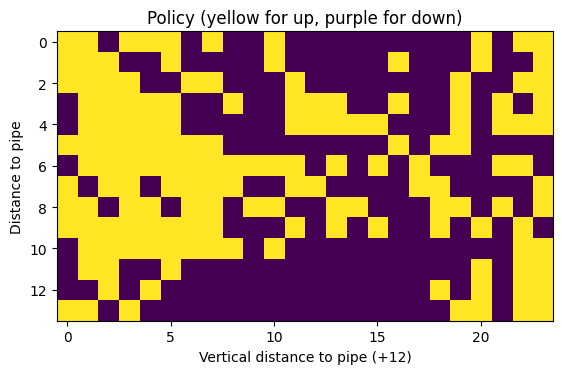

In [23]:
plot_policy(best_SARSA_agent)

## Screen environnement

In [9]:
# We set the number of episodes to 2000 here, otherwise it would take too long to run
results_sarsa_screen = grid_search_params(env_screen, "SL", param_dict_sarsa, num_episodes=2000, max_score=100, seed=42)

Set 1 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 2000/2000 [03:43<00:00,  8.95it/s]


Set 2 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 2000/2000 [01:56<00:00, 17.20it/s]


Set 3 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 2000/2000 [01:45<00:00, 18.97it/s]


Set 4 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 2000/2000 [01:35<00:00, 21.04it/s]


Set 5 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 2000/2000 [01:17<00:00, 25.86it/s]


Set 6 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 2000/2000 [01:30<00:00, 22.04it/s]


Set 7 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 2000/2000 [00:48<00:00, 41.19it/s]


Set 8 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 2000/2000 [01:07<00:00, 29.79it/s]


Set 9 : Running alpha: 0.01, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 2000/2000 [00:56<00:00, 35.58it/s]


Set 10 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 2000/2000 [06:30<00:00,  5.12it/s]


Set 11 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 2000/2000 [07:42<00:00,  4.33it/s]


Set 12 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 2000/2000 [08:19<00:00,  4.00it/s]


Set 13 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 2000/2000 [06:29<00:00,  5.14it/s]


Set 14 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 2000/2000 [06:47<00:00,  4.91it/s]


Set 15 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 2000/2000 [06:05<00:00,  5.47it/s]


Set 16 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 2000/2000 [02:39<00:00, 12.50it/s]


Set 17 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 2000/2000 [02:16<00:00, 14.61it/s]


Set 18 : Running alpha: 0.01, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 2000/2000 [02:39<00:00, 12.54it/s]


Set 19 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 2000/2000 [02:04<00:00, 16.01it/s]


Set 20 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 2000/2000 [01:42<00:00, 19.55it/s]


Set 21 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 2000/2000 [04:18<00:00,  7.75it/s]


Set 22 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 2000/2000 [02:22<00:00, 13.99it/s]


Set 23 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 2000/2000 [03:19<00:00, 10.05it/s]


Set 24 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 2000/2000 [02:11<00:00, 15.24it/s]


Set 25 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 2000/2000 [00:42<00:00, 47.10it/s]


Set 26 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 2000/2000 [00:53<00:00, 37.21it/s]


Set 27 : Running alpha: 0.1, epsilon: 0.1, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 2000/2000 [00:57<00:00, 34.51it/s]


Set 28 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.1


100%|██████████| 2000/2000 [06:27<00:00,  5.16it/s]


Set 29 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.5


100%|██████████| 2000/2000 [07:41<00:00,  4.33it/s]


Set 30 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.9999, lambd: 0.9


100%|██████████| 2000/2000 [09:08<00:00,  3.65it/s]


Set 31 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.1


100%|██████████| 2000/2000 [06:19<00:00,  5.26it/s]


Set 32 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.5


100%|██████████| 2000/2000 [11:44<00:00,  2.84it/s]


Set 33 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.999, lambd: 0.9


100%|██████████| 2000/2000 [14:43<00:00,  2.26it/s]


Set 34 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.1


100%|██████████| 2000/2000 [05:02<00:00,  6.60it/s]


Set 35 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.5


100%|██████████| 2000/2000 [03:47<00:00,  8.79it/s]


Set 36 : Running alpha: 0.1, epsilon: 0.5, epsilon_decay: 0.99, lambd: 0.9


100%|██████████| 2000/2000 [05:39<00:00,  5.90it/s]


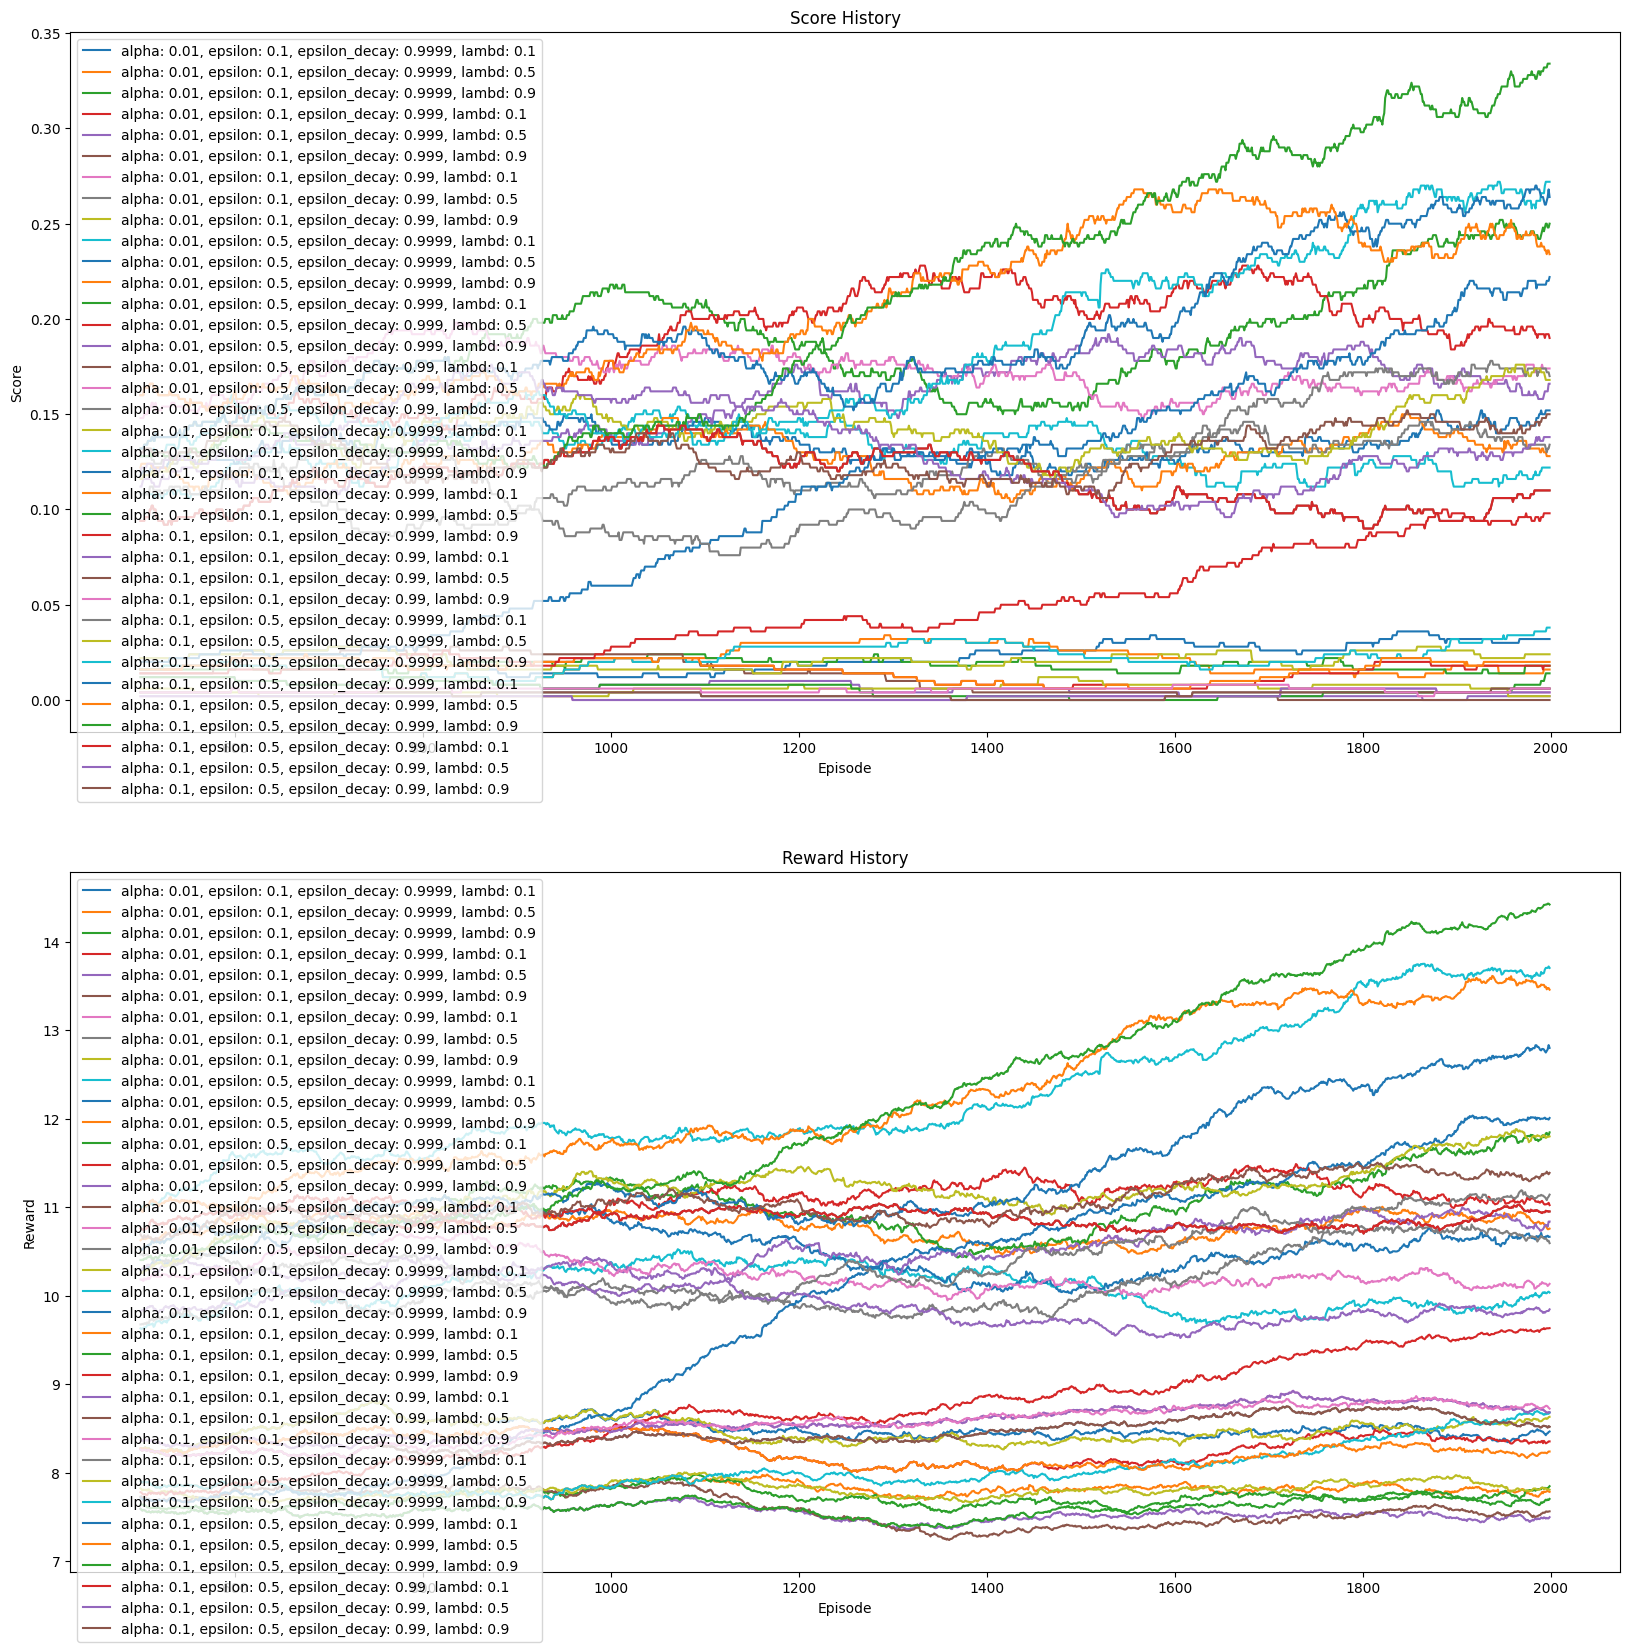

In [11]:
plot_results(results_sarsa_screen)

In [12]:
best_params = get_best_params(results_sarsa_screen)
print("The best parameters are : \n",best_params)

The best parameters are : 
 {'alpha': 0.1, 'epsilon': 0.5, 'epsilon_decay': 0.999, 'lambd': 0.9, 'num_actions': 2, 'epsilon_min': 0.01, 'seed': 42}


# Adaptation to different environnements settings

Here we test how our best agents can adapt to different environnement settings without retraining them. Since the state space is a bit different, we choose a random action if the state is unkonwn to the agent.

In [8]:
env_difficult = gym.make('TextFlappyBird-v0', height = 13, width = 17, pipe_gap = 3)
env_easy = gym.make('TextFlappyBird-v0', height = 17, width = 23, pipe_gap = 5)

best_MC_params = {
    'alpha': 0.5,
    'epsilon': 0.5,
    'epsilon_decay': 0.99,
    'num_actions': 2,
    'epsilon_min': 0.01,
    'seed': 42,
}
MC_best_agent = MCControlAgent(env, best_MC_params)
random.seed(42)
MC_best_policy, best_score_MC, best_reward_MC = MC_best_agent.train(num_episodes=5000, max_score=100)

100%|██████████| 5000/5000 [02:13<00:00, 37.37it/s] 


In [9]:
def get_action_in_diff_setting(policy, state):
    if state in policy:
        return policy[state]
    else:
        return random.choice([0, 1])

In [12]:
def compute_average_score(policy, env, num_episodes=1000):
    scores = []
    rewards = []
    for _ in range(num_episodes):
        state = env.reset()
        state = tuple(np.array(state[0]).reshape(-1)) #hashable state
        done = False
        score = 0
        total_reward = 0
        while not done:
            action = get_action_in_diff_setting(MC_best_policy, state)
            state, reward, done, _, info = env.step(action)
            state = tuple(np.array(state).reshape(-1)) #hashable state
            total_reward += reward
        score = info['score']
        scores.append(score)
        rewards.append(total_reward)
    return np.mean(scores), np.mean(rewards)

In [13]:
score_base, reward_base = compute_average_score(MC_best_policy, env, num_episodes=1000)
score_difficult, reward_difficult = compute_average_score(MC_best_policy, env_difficult, num_episodes=1000)
score_easy, reward_easy = compute_average_score(MC_best_policy, env_easy, num_episodes=1000)

print("The average score and reward in the base setting are : ", score_base, reward_base)
print("The average score and reward in the difficult setting are : ", score_difficult, reward_difficult)
print("The average score and reward in the easy setting are : ", score_easy, reward_easy)

The average score and reward in the base setting are :  31.639 329.108
The average score and reward in the difficult setting are :  1.336 23.024
The average score and reward in the easy setting are :  13.628 174.621
